In [1]:
import pandas as pd
import geopandas
import numpy as np
import cvxpy as cvx
import osmnx as osmnx
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data_dir = "../UTD2019/"
counts_file = "utd19_u - Copy.csv"
detectors_file = "detectors_public - Copy.csv"
links_file = "links.csv"

In [3]:
# city = "all" to read in original dataset (6GB) and write out each city's dataset separately
city="melbourne"
city_file = "counts_"+city+".csv"


In [4]:
data=np.load(data_dir+"/OSM/"+city+"/Aij.npz")

In [5]:
aij=data["aij"]

In [6]:
modelname="AE_aij"

In [7]:
data=np.load(data_dir+"/OSM/"+city+"/"+modelname+"_out.npz")

In [8]:
ytrain=data["ytrain"]
yval=data["yval"]

In [9]:
yhats_train_ae=data["yhats_train"]
yhats_val_ae=data["yhats_val"]
out_train_cpu_ae=data["out_train_cpu"]
out_val_cpu_ae=data["out_val_cpu"]
avtrainloss_ae=data["avtrainloss_trace"]
avvalloss_ae=data["avvalloss_trace"]

In [10]:
modelname="MLP_aij"

In [11]:
data=np.load(data_dir+"/OSM/"+city+"/"+modelname+"_out.npz")

In [12]:
yhats_train_mlp=data["yhats_train"]
yhats_val_mlp=data["yhats_val"]
out_train_cpu_mlp=data["out_train_cpu"]
out_val_cpu_mlp=data["out_val_cpu"]
avtrainloss_mlp=data["avtrainloss_trace"]
avvalloss_mlp=data["avvalloss_trace"]

In [13]:
modelname="MLP_P_mat"

In [14]:
data=np.load(data_dir+"/OSM/"+city+"/"+modelname+"_out.npz")

In [15]:
yhats_train_P_mat=data["yhats_train"]
yhats_val_P_mat=data["yhats_val"]
out_train_cpu_P_mat=data["out_train_cpu"]
out_val_cpu_P_mat=data["out_val_cpu"]
avtrainloss_P_mat=data["avtrainloss_trace"]
avvalloss_P_mat=data["avvalloss_trace"]

# Compare counts from the models
### Percent difference, zero is best

In [16]:
print((np.sum(yval)-np.sum(yhats_val_ae))/(np.sum(yval)))
print((np.sum(yval)-np.sum(yhats_val_mlp))/(np.sum(yval)))
print((np.sum(yval)-np.sum(yhats_val_P_mat))/(np.sum(yval)))

0.5277735063070751
0.282373720821588
0.9909714610859626


# Compare OD Flows of the models to average of all models
### The models with aij agree more with each other

In [17]:
mean_out=(np.sum(out_val_cpu_mlp)+ np.sum(out_val_cpu_ae)+ np.sum(out_val_cpu_P_mat))/3.
print(np.sum(out_val_cpu_mlp), np.sum(out_val_cpu_ae), np.sum(out_val_cpu_P_mat))
print(np.sum(out_val_cpu_mlp)/mean_out, np.sum(out_val_cpu_ae)/mean_out, np.sum(out_val_cpu_P_mat)/mean_out)

1129843.451501274 768747.32171309 7375385.080379587
0.3654883739200458 0.24867888395951881 2.385832742120435


In [18]:
print(np.max(out_val_cpu_mlp))
print(np.max(out_val_cpu_ae))
print(np.max(out_val_cpu_P_mat))

226.25827026367188
57.17850112915039
3706.59912109375


In [19]:
print(np.min(out_val_cpu_mlp))
print(np.min(out_val_cpu_ae))
print(np.min(out_val_cpu_P_mat))

0.0
0.0
0.0


In [20]:
trace_tuned=np.load(data_dir+"/OSM/"+city+"/route_flows_mcmc.npy")

In [21]:
trace_tuned.shape

(1001, 627, 3)

In [22]:
trace_tuned[-1,:,0]

array([ 13.,   7.,   1.,  15.,  11.,  17.,  15.,   9.,   2.,  10.,   8.,
        20.,  30.,  13.,   7.,   1.,   3.,   1.,   5.,   1.,  17.,   1.,
        10.,  15.,   1.,   8.,   1.,   1.,   1.,  48.,  24.,  12.,   8.,
         6.,  10.,  14.,   1.,   4.,   4.,   1.,   2.,   9.,   1.,   2.,
         5.,   7.,   1.,   1.,   1.,   1.,   1.,   1.,  11.,   1.,   1.,
         1.,   1.,   1.,   7.,   1.,   1.,   9.,   2.,   1.,  11.,   5.,
        11.,   1.,   2.,   3.,   1.,  11.,   7.,   7.,   1.,   6.,   2.,
         8.,   1.,   5.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   1.,   1.,   5.,   1.,   1.,   1.,   4.,
         2.,   1.,   2.,   1.,   1.,   1.,   9.,   7.,   6.,   1.,   2.,
         4.,   4.,   1.,   1.,   1.,   2.,   1.,   7.,   1.,   2.,   1.,
         1.,   1.,   1.,   1.,   1.,   6.,   1.,   3.,   1.,   1.,   1.,
         2.,   2.,   1.,  39.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   7.,   1.,   1.,   1.,   1.,   1.,   

In [49]:
print('$\\lambda'+str(j)+'$')

$\lambda626$


In [58]:
lam_labels=[]
for j in range(0,trace_tuned.shape[1],20):
    string='$\\lambda'+str(j)+'$'
    lam_labels.append(string)

In [59]:
print(lam_labels)

['$\\lambda0$', '$\\lambda20$', '$\\lambda40$', '$\\lambda60$', '$\\lambda80$', '$\\lambda100$', '$\\lambda120$', '$\\lambda140$', '$\\lambda160$', '$\\lambda180$', '$\\lambda200$', '$\\lambda220$', '$\\lambda240$', '$\\lambda260$', '$\\lambda280$', '$\\lambda300$', '$\\lambda320$', '$\\lambda340$', '$\\lambda360$', '$\\lambda380$', '$\\lambda400$', '$\\lambda420$', '$\\lambda440$', '$\\lambda460$', '$\\lambda480$', '$\\lambda500$', '$\\lambda520$', '$\\lambda540$', '$\\lambda560$', '$\\lambda580$', '$\\lambda600$', '$\\lambda620$']


C:\Users\jkhac\AppData\Local\Temp\ipykernel_3292\2107280969.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(8, 2))


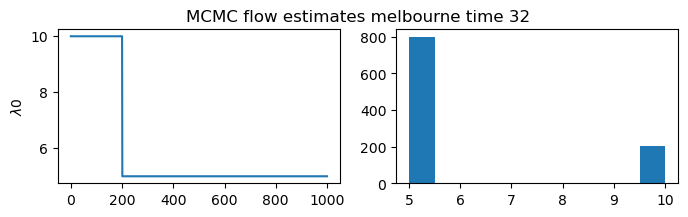

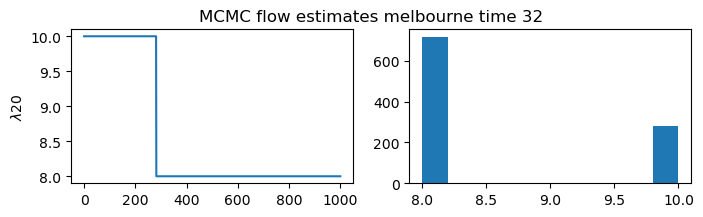

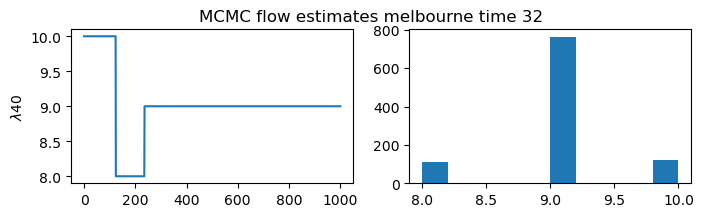

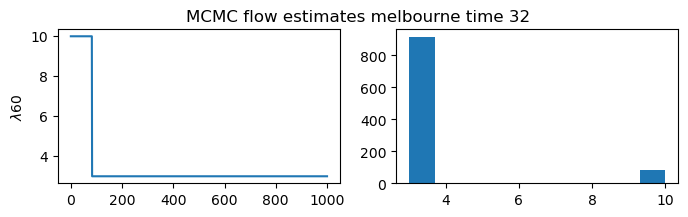

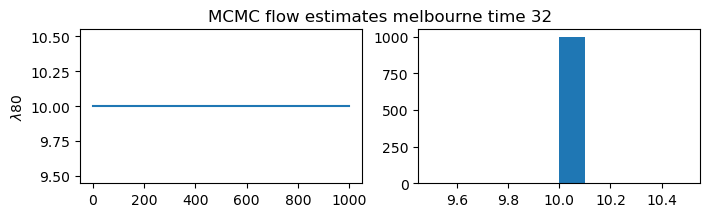

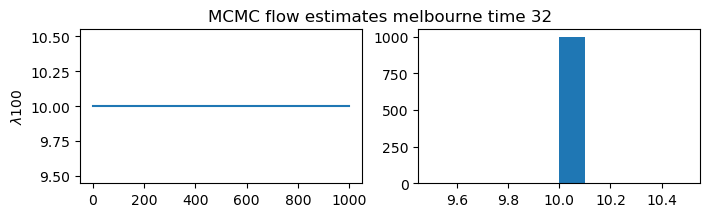

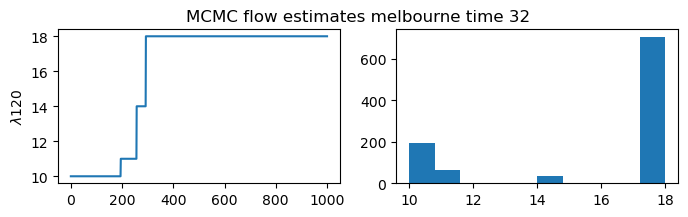

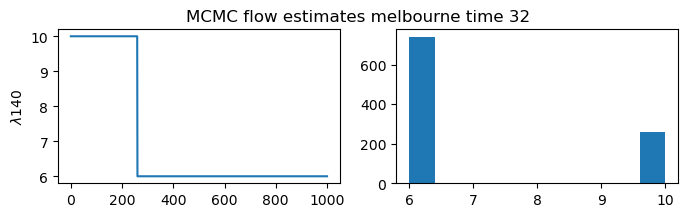

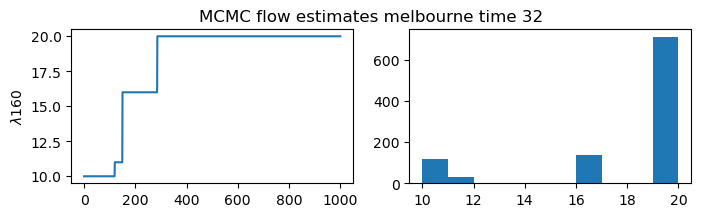

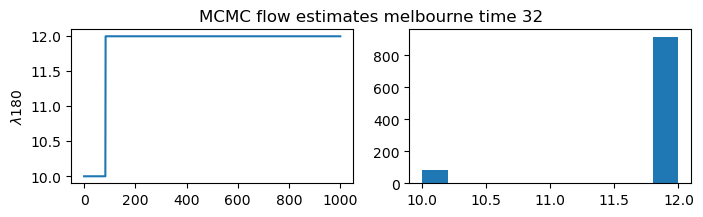

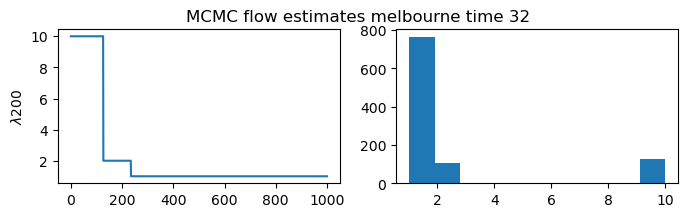

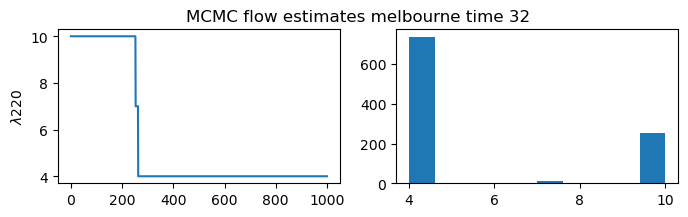

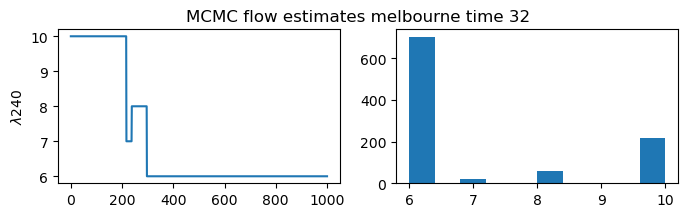

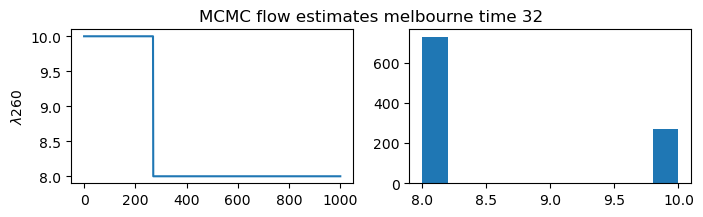

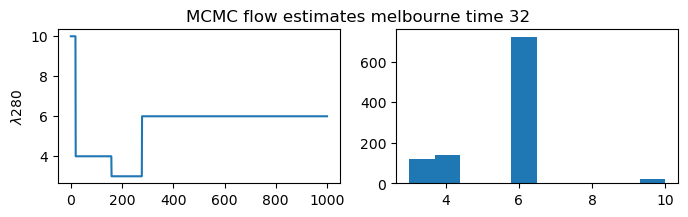

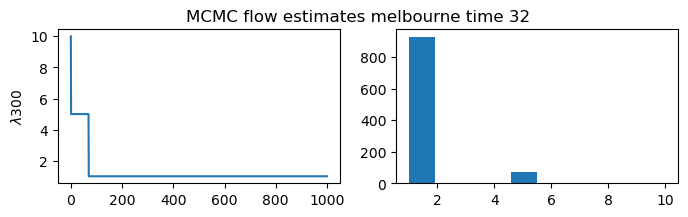

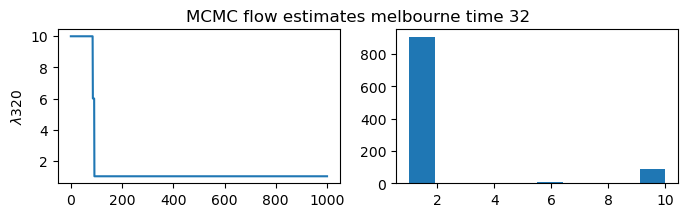

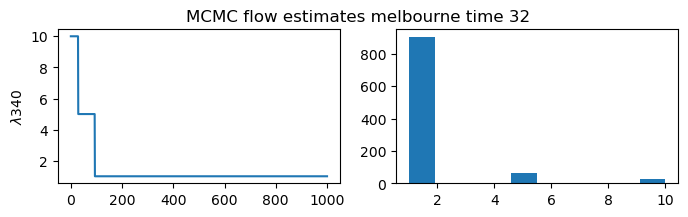

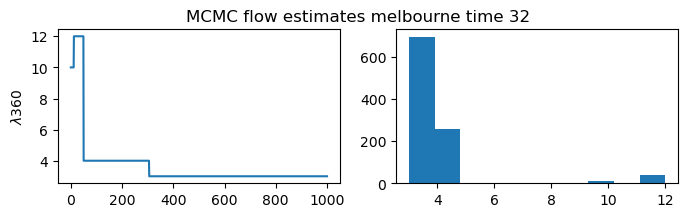

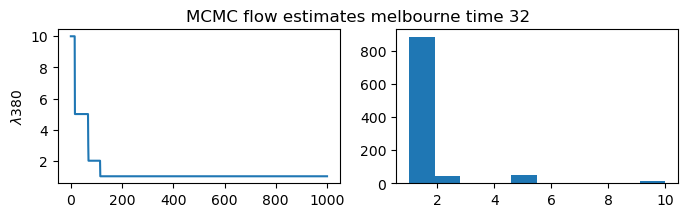

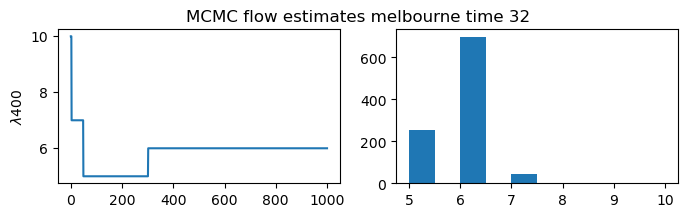

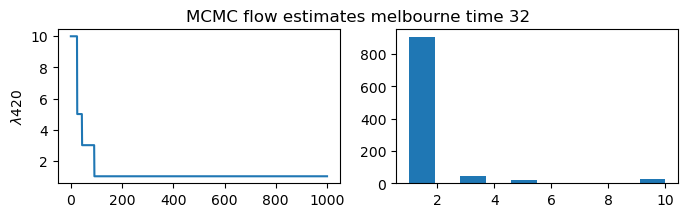

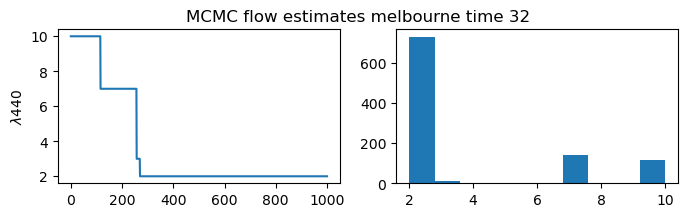

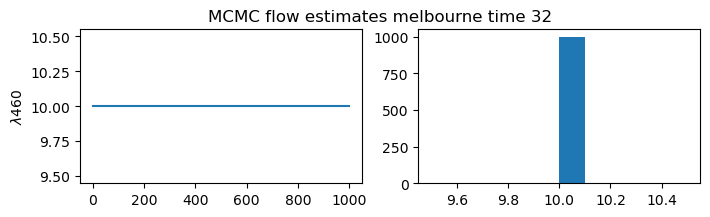

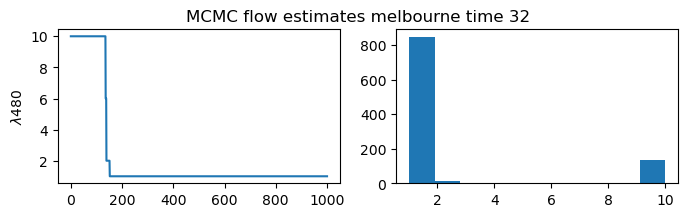

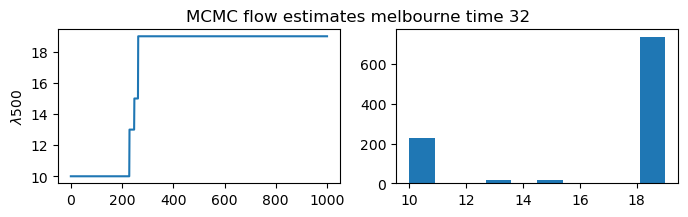

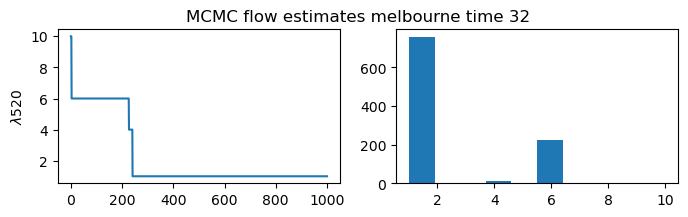

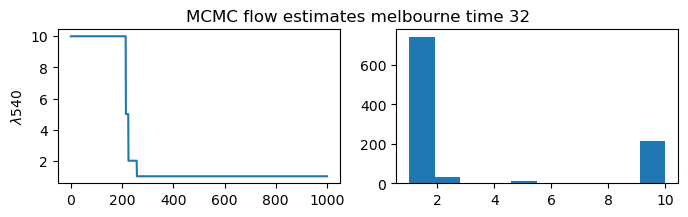

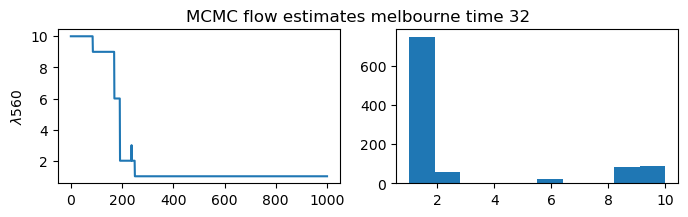

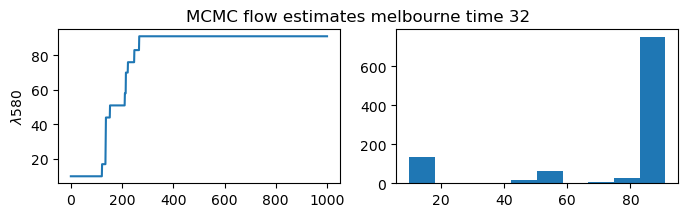

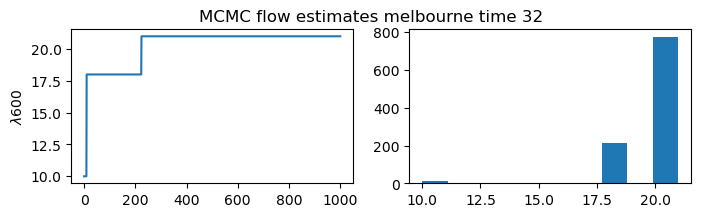

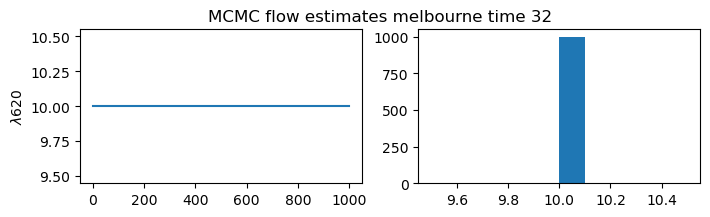

In [60]:
time_slice=2
counts_time=range(1440)
time_of_day=counts_time[30+time_slice]
lams=trace_tuned[:,:,time_slice]
#lams=trace_tuned
#lam_labels=["$\lambda1$", "$\lambda2$", "$\lambda3$","$\lambda4$","$\lambda5$","$\lambda6$",
#            "$\lambda7$","$\lambda8$","$\lambda9$","$\lambda610$","$\lambda11$","$\lambda12$",
#            "$\lambda13$","$\lambda14$","$\lambda15$","$\lambda16$"]
for param, samples in zip(lam_labels, lams.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    #axes[1].hist(samples[int(len(samples)/2):])
    axes[1].hist(samples)
    plt.suptitle("MCMC flow estimates "+city+" time "+str(time_of_day))